In [1]:
version = "v2.1.5"

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# update this string!
student_name = "STEFAN BUND"

In [4]:
# Autograder tests
print(f"Notebook version {version}")
print(f"Student name: {student_name}")

# Some hidden tests

Notebook version v2.1.5
Student name: STEFAN BUND


<a id='toc'></a>
# Table of Contents
- **[Assignment 4 Description](#Topic0)**
  - [Task 1 - Import CSV Sensor Data file](#t1)
  - [Task 2 - Standard train_test_split](#t2)
  - [Task 3 - Build a baseline Tree model](#t3)
  - [Task 4 - Baseline Tree model questions](#t4)
  - [Task 5a - A custom train_test_split function](#t5a)
  - [Task 5b - Run a baseline_model](#t5b)
  - [Task 5c - Custom train/test split questions](#t5c)
  - [Task 6 - Confusion Matrix](#t6)
    - [Visualizing the Confusion Matrix](#vcm)
  - [Task 7 - Basic Confusion Matrix Understanding](#t7)
  - [Task 8 - Feature Importance, part 1](#t8)
  - [Task 9 - Feature Importance, part 2](#t9)  
    - [Scores Plot](#scoresplot)
  - [Task 10 - Final project](#t10)
    - [Task 10 Autograder Scoring](#t10ag)

<a id='Topic0'></a>
# Assignment 4 - Tree-based classification & Synthesis Project

### Physiological Sensor Data Analysis (100 points)
This synthesis project is based on a dataset of physiological sensor measurements collected from Smartphone based sensors. The original research sought to determine the particular activity of the subject based on the physiological measurements obtained from wearables and a SmartPhone. The physiological measurements were used to depict the test subject in one of four activities as follows:  
   - neutral
   - emotional
   - mental
   - physical  
 
Your task will be to produce a model that, based on a limited number of features, returns the best possible estimate of the activity being performed by the test subject. While the original analysis utilized more advanced Machine Learning methods, we will concentrate on the supervised learning methods covered in this course.  

The sensor dataset consists of 4480 rows, each with the subject ID, the activity label and 533 measurement features! Each of the 40 test volunteers were subjected to a series of 28 data collection events for each of the four activity types presented above. As you explore this data, you will find that the features are arranged by a particular measurement mode, each consisting of similar statistical values.  
Before we get started, it will be necessary to ingest and prepare our data for training and testing purposes.  

**Notes**  
 - Any available random_state or seed values should be initialized with an integer value of 42.
 - Some standard package imports have been provided below.
 - Additional import deemed necessary for your analysis can be added in the cell following.  
 
 <a href='#toc'>TOC</a>

In [6]:
import warnings

In [7]:
# useful python standard libraries
import itertools
import math
import random

# import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# helpful SciKit-Learn libraries
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
import numpy as np
import math

In [9]:
# path/filename to dataset
sensor_data = "assets/sensor_data.csv"

# We will use this variable name multiple times
base_feature_selector = "_mad_"

In [10]:
np.set_printoptions(precision=4)

## Additional imports can be inlcuded here

<a id='t1'></a>
## Task 1 - Import CSV Sensor Data file (2 points).
 - The first order of business is to read the data file, '_sensor_data.csv_ ', from the '_assets/_ ' folder.
 - Your function should accept zero arguments and return a Pandas DataFrame.
 - Be aware that the raw activity labels are in a form that may or may not work with your chosen model(s). Therefore, reassign the activity labels using the following mapping:  
    - **'neutral' == 1**
    - **'emotional' == 2**
    - **'mental' == 3**
    - **'physical' == 4**  
    
<a href='#toc'>TOC</a>

In [11]:
# hidden autograder codeblock
task_id = "1"

In [12]:
def get_sensor_data():
    df = pd.read_csv(sensor_data)
#     df = pd.read_csv('sensor_data.csv')
    df['Activity_Label'] = df['Activity_Label'].map({'neutral': 1, 'emotional': 2, 'mental': 3, \
                                     'physical': 4})
    return df

In [13]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

get_sensor_data().head(250)

,Subject_ID,Activity_Label,ECG_original_mean_1,ECG_original_std_2,ECG_original_trimmean25_3,ECG_original_median_4,ECG_original_skewness_5,ECG_original_kurtosis_6,ECG_original_max_7,ECG_original_min_8,...,EDA_Functionals_power_Filt2skewness_524,EDA_Functionals_power_Filt2kurtosis_525,EDA_Functionals_power_Filt2max_526,EDA_Functionals_power_Filt2min_527,EDA_Functionals_power_Filt2prctile25_528,EDA_Functionals_power_Filt2prctile75_529,EDA_Functionals_power_Filt2geomean(abs)_530,EDA_Functionals_power_Filt2harmmean_531,EDA_Functionals_power_Filt2mad_532,EDA_Functionals_power_Filt2baseline_533
0,QNNG,1,-0.004125,0.254095,0.001426,-0.010370,-0.538509,5.95534,1.04063,-1.374370,...,31.4249,1015.36,7.170320e+08,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0
1,QNNG,1,0.031029,0.193761,0.012918,-0.002370,0.781415,5.18794,0.98963,-0.719370,...,31.4354,1015.78,7.058540e+08,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0
2,QNNG,1,0.015678,0.182336,-0.003028,-0.023370,0.881194,5.66530,0.87563,-0.719370,...,31.4480,1016.16,6.270180e+08,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0
3,QNNG,1,0.014525,0.176636,-0.006161,-0.027370,1.024900,6.10968,0.91063,-0.719370,...,31.4333,1015.61,5.597480e+08,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0
4,QNNG,1,0.010349,0.179248,-0.008526,-0.027370,0.935697,5.83902,0.91063,-0.756370,...,31.4346,1015.67,4.844730e+08,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,GVJD,1,0.000069,0.187193,-0.043176,-0.073865,2.737650,12.38830,1.09113,-0.181865,...,31.4289,1015.51,1.056460e+10,0.134978,31.58940,234.0960,100.80500,15.45560,20817300.0,38929400.0
246,GVJD,1,-0.001865,0.186908,-0.046055,-0.077865,2.764910,12.48700,1.09113,-0.181865,...,31.4224,1015.21,9.893930e+09,0.176037,30.33650,227.5120,96.87520,15.63590,19505200.0,38783700.0
247,GVJD,1,-0.002578,0.193167,-0.043957,-0.075865,2.627850,11.97830,1.24013,-0.321865,...,31.4265,1015.52,9.195170e+09,0.156823,26.61840,205.0150,87.65860,14.06780,18117900.0,38635100.0
248,GVJD,1,-0.003646,0.193385,-0.045367,-0.080865,2.612990,11.87190,1.24013,-0.321865,...,31.4349,1015.69,8.134550e+09,0.205325,24.85820,185.8150,81.35860,15.13390,16023800.0,38482100.0


In [14]:
df = get_sensor_data()
l = df.columns
l

Index(['Subject_ID', 'Activity_Label', 'ECG_original_mean_1',
       'ECG_original_std_2', 'ECG_original_trimmean25_3',
       'ECG_original_median_4', 'ECG_original_skewness_5',
       'ECG_original_kurtosis_6', 'ECG_original_max_7', 'ECG_original_min_8',
       ...
       'EDA_Functionals_power_Filt2skewness_524',
       'EDA_Functionals_power_Filt2kurtosis_525',
       'EDA_Functionals_power_Filt2max_526',
       'EDA_Functionals_power_Filt2min_527',
       'EDA_Functionals_power_Filt2prctile25_528',
       'EDA_Functionals_power_Filt2prctile75_529',
       'EDA_Functionals_power_Filt2geomean(abs)_530',
       'EDA_Functionals_power_Filt2harmmean_531',
       'EDA_Functionals_power_Filt2mad_532',
       'EDA_Functionals_power_Filt2baseline_533'],
      dtype='object', length=535)

In [15]:
# Autograder tests
print(f"Task {task_id} - AG tests")

stu_ans = get_sensor_data()

assert isinstance(
    stu_ans, pd.DataFrame
), f"Task {task_id}: Your get_sensor_data function must return a Pandas DataFrame."

assert isinstance(
    stu_ans.iloc[0][2], np.float64
), f"Task {task_id}: The dtype of the first row, third column, is incorrect."

# Some hidden tests
del stu_ans

Task 1 - AG tests


<a id='t2'></a>
## Task 2 - Standard train_test_split (3 points).

 - Our first exercise will be to produce a SciKit-Learn standard train/test split of a dataframe. In the following cell, complete the function that returns a standard train/test split of the sensor data.
   - The function should accept a dataframe as produced by get_sensor_data() and a test_size value which defaults to 0.2.
   - The function should incorporate the **stratify** parameter in the [train_test_split](https://scikit-learn.org/1.1/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function.
   - The function should return the standard X_train, X_test, y_train, y_test.  

<a href='#toc'>TOC</a>

In [16]:
# hidden autograder codeblock
task_id = "2"

In [17]:
def std_train_test_split(df, test_size=0.2):
    r = list(get_sensor_data().columns)
    r.pop(1)
#     dependent_columns = r 
    x = df[r]
    y = df['Activity_Label']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y,random_state=42)
    return X_train, X_test, y_train, y_test

In [18]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

X_train, X_test, y_train, y_test = std_train_test_split(get_sensor_data(), test_size=0.2)

In [19]:
# Autograder tests
print(f"Task {task_id} - AG tests")
df = get_sensor_data()
stu_ans = std_train_test_split(df)

# print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(
    stu_ans[0], pd.DataFrame
), f"Task {task_id}: X_train should be a pd.DataFrame"

assert isinstance(
    stu_ans[2], pd.Series
), f"Task {task_id}: y_train should be a pd.Series"

# Some hidden tests
del stu_ans
del df

Task 2 - AG tests


<a id='t3'></a>
## Task 3 - Build a baseline Tree model (5 Points).

- Complete the following function that will establish a baseline score.  
  - This function should retrieve and split the sensor data based on your previously constructed functions. Please use/default to, a split value of 0.2.  
  - Using a _for loop_ or [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp), extract a list of feature names that includes the substring **base_feature_selector** defined in the **[library imports](#library-imports)** cell above.  
  - Create a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) with default hyperparameters and the predetermined random_state value.
    - Train this model on the features as extracted above.  
  - Using the classifier's [score method](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score), score the model using X_test and the previously extracted subset of features.  
  - Finally return a tuple consisting of the list of extracted features and score.  

<a href='#toc'>TOC</a>

In [20]:
# hidden autograder codeblock
task_id = "3"

In [22]:
import pandas as pd
mad_features = [col for col in X_train.columns if base_feature_selector in col]
print(mad_features)

['ECG_original_mad_13', 'ECG_RR_window_mad_27', 'ECG_amplitude_RR_mad_41', 'ECG_HR_min_div_mad_55', 'ECG_hrv_mad_79', 'ECG_PSD_mad_93', 'ECG_p_VFL_mad_107', 'ECG_p_LF_mad_121', 'ECG_p_MF_mad_135', 'ECG_p_HF_mad_149', 'ECG_p_total_LF_mad_163', 'IT_Original_mad_187', 'IT_LF_mad_202', 'IT_RF_mad_217', 'IT_BRV_mad_233', 'IT_PSD_mad_247', 'IT_VLF_mad_261', 'IT_LF_mad_275', 'IT_MF_mad_289', 'IT_HF_mad_303', 'IT_p_Total_mad_317', 'EDA_Original_mad_338', 'EDA_processed_mad_352', 'EDA_Filt1_mad_366', 'EDA_Filt2_mad_380', 'EDA_Original_mad_442', 'EDA_processed_mad_456', 'EDA_Filt1_mad_470', 'EDA_Filt2_mad_484']


In [23]:
x_trainSubjects = X_train['Subject_ID']

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [25]:
def baseline_model_one():
    mad_features = [col for col in X_train.columns if base_feature_selector in col]
    
    clf = DecisionTreeClassifier(random_state=42).fit(X_train[mad_features], y_train) #random_state=42, min_samples_split=0.2
    
    score =clf.score(X_test[mad_features], y_test)
    
    features = list(clf.feature_names_in_)
    
    print("Accuracy of Decision Tree classifier on test set: {:.3f}".format(score))
    return (features, score)

In [26]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

baseline_model_one()

Accuracy of Decision Tree classifier on test set: 0.816


(['ECG_original_mad_13',
  'ECG_RR_window_mad_27',
  'ECG_amplitude_RR_mad_41',
  'ECG_HR_min_div_mad_55',
  'ECG_hrv_mad_79',
  'ECG_PSD_mad_93',
  'ECG_p_VFL_mad_107',
  'ECG_p_LF_mad_121',
  'ECG_p_MF_mad_135',
  'ECG_p_HF_mad_149',
  'ECG_p_total_LF_mad_163',
  'IT_Original_mad_187',
  'IT_LF_mad_202',
  'IT_RF_mad_217',
  'IT_BRV_mad_233',
  'IT_PSD_mad_247',
  'IT_VLF_mad_261',
  'IT_LF_mad_275',
  'IT_MF_mad_289',
  'IT_HF_mad_303',
  'IT_p_Total_mad_317',
  'EDA_Original_mad_338',
  'EDA_processed_mad_352',
  'EDA_Filt1_mad_366',
  'EDA_Filt2_mad_380',
  'EDA_Original_mad_442',
  'EDA_processed_mad_456',
  'EDA_Filt1_mad_470',
  'EDA_Filt2_mad_484'],
 0.8158482142857143)

In [27]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = baseline_model_one()
print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(stu_ans, tuple), "Task 3: Your function should return a tuple."

assert isinstance(
    stu_ans[0], list
), f"Task {task_id}: Tuple element zero should be a list object."

assert isinstance(
    stu_ans[1], np.float64
), f"Task {task_id}: Tuple element one should be a np.float64 value."

# Some hidden tests

del stu_ans

Task 3 - AG tests
Accuracy of Decision Tree classifier on test set: 0.816
Task 3 - your answer:
(['ECG_original_mad_13', 'ECG_RR_window_mad_27', 'ECG_amplitude_RR_mad_41', 'ECG_HR_min_div_mad_55', 'ECG_hrv_mad_79', 'ECG_PSD_mad_93', 'ECG_p_VFL_mad_107', 'ECG_p_LF_mad_121', 'ECG_p_MF_mad_135', 'ECG_p_HF_mad_149', 'ECG_p_total_LF_mad_163', 'IT_Original_mad_187', 'IT_LF_mad_202', 'IT_RF_mad_217', 'IT_BRV_mad_233', 'IT_PSD_mad_247', 'IT_VLF_mad_261', 'IT_LF_mad_275', 'IT_MF_mad_289', 'IT_HF_mad_303', 'IT_p_Total_mad_317', 'EDA_Original_mad_338', 'EDA_processed_mad_352', 'EDA_Filt1_mad_366', 'EDA_Filt2_mad_380', 'EDA_Original_mad_442', 'EDA_processed_mad_456', 'EDA_Filt1_mad_470', 'EDA_Filt2_mad_484'], 0.8158482142857143)


<a id='t4'></a>
## Task 4 - Baseline Tree model questions (3 Points).

1. Does the default accuracy score returned by the model seem reasonable to you; why or why not?
2. What might be the problem with this model or with the data?  

<a href='#toc'>TOC</a>

The 81% accuracy score reflects the tree model's ability to correctly predict a classifier, given the multiple labels in the dataset. The breadth of labels suggests that the model posseses some rigor. The depth of the tree which was used is the default. This implies that the tree will use a minimum of two levels in order to predict a class of object. 

I am concerned about data leakage in this model. There are only four basic Activity Labels, which are dispersed across roughly four thousand instances, where only 40 users recorded their data. This implies that using a standard test-train split may expose the training data to leakage. Given the test split of 20%, this allows for a healthy segment of the data set to be used for training. However, if the individual users' data leaks between train and test, the trainer will have absorbed biased data. 

The number of labeled columns trained and fit by the tree creates a rich set of classifying features, but the strategy of the test/split will expose the model to situations where conditions are shared between test and train, thus creating an illusion that the prediction is better than it is. The reality is that rules learned by the decision tree in the training phase actually consumes use-cases which will exist within the test cases, thereby creating more accuracy in the score, without providing actual predictive capability in the model. 

The current strategy does not respect the boundary between use cases, grouped by Subject_ID. This means that as production data is put into the model, its performance will likely reduce.

<a id='t5a'></a>
## Task 5a- A custom train_test_split function (10 Points).

 - Because of the nature of the original experiment's data collection methodology, the standard sklearn train_test_split() method cannot be applied successfully to this dataset. 
 - The first significant task will be to create a 'custom_train_test_split()' function that will correctly separate train data from test data, given the structure of the data in the sensor dataset.  
 - Your function should accept two arguments:  
   - A Pandas DataFrame such as returned by your get_sensor_data() function.
   - **Note**, your train and test data should **retain** the 'Subject_ID' column!
     - This is **NOT** a requirement to use the 'Subject_ID' in the model.
   - An integer ___or___ float value that indicates the count or proportion of the **test** data split.
   - In accordance with SciKit-Learn standards, split count determinations should round up.
   - Again, any random_state or seed values should be initialized with an integer value of 42.
 - Helpful Libraries and functions:
   - [numpy.random](https://numpy.org/doc/stable/reference/random/index.html)
     - numpy.random.seed()
     - numpy.random.choice()
   - Python [math](https://docs.python.org/3/library/math.html)  
     - math.ceil()  
  
 - Questions to keep in mind while creating this function:
   - How might this function accept and use an integer or float value for the purpose of dividing the dataset?
   - How do I ensure consistent random selection for reproducibility?
   - Most importantly, how do I split this data to avoid one of the more devastating issues in machine learning?  

<a href='#toc'>TOC</a>

In [28]:
# hidden autograder codeblock
task_id = "5a"

In [29]:
import random

In [30]:
def custom_train_test_split(df, test_size=0.2):
    X_train, X_test, y_train, y_test = (None,) * 4
    np.random.seed(42)
#     df=get_sensor_data()
    if test_size <1:
        test_size = math.ceil(test_size * 40)
        print("test size =>", test_size)
    idSet = list(df['Subject_ID'].unique())
    limit = len(idSet)
    test_randoms = np.random.choice(limit, test_size, replace=False)
    test_subjects = []
    for r in test_randoms:
        test_subjects.append(idSet[r])
#     print("TEST subjects:",test_subjects)
                                #generate test_df by getting all rows where subject_id is in test_subjects
    x_test = df[df['Subject_ID'].isin(test_subjects)]
                                #gets subject_id where idSet is not in test_randoms
    limitList = np.arange(limit)
#     print(limitList)
    tr = np.array(test_randoms)
#     print("test numbers",tr)
    train_ids = np.setdiff1d(limitList,tr)
#     print("TRAIN ids:",train_ids)
    train_subjects = []
    for i in train_ids:
        train_subjects.append(idSet[i])
#     print("TRAIN SUBJECTS:",train_subjects)
        
    x_train = df[df['Subject_ID'].isin(train_subjects)]     
    
    y_test = x_test['Activity_Label']
    y_train = x_train['Activity_Label']
    x_train = x_train.drop(['Activity_Label'], axis=1)
    x_test = x_test.drop(['Activity_Label'], axis=1)
    return x_train, x_test, y_train, y_test

In [31]:
def test_my_code():
    test_size = .2
    df = get_sensor_data()

    X_train, X_test, y_train, y_test = custom_train_test_split(df, test_size=test_size)

#     print(f"{df.shape[0]}, {X_train.shape[0]}, {X_test.shape[0]}")
#     print("y_test", type(y_train))
#     print("y_test")
#     print(y_test.head(1), y_test.shape[0])
#     print("X_train:")
#     print(X_train.columns, X_train.shape[0])

#     print("X_train", X_train.head())
    return None
test_my_code()

test size => 8


In [32]:
# Autograder tests
print(f"Task {task_id} - AG tests")

test_size = 5
df = get_sensor_data()

stu_ans = custom_train_test_split(df, test_size)

# print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(
    stu_ans[0], pd.DataFrame
), f"Task {task_id}: X_train should be a pd.DataFrame"

assert isinstance(
    stu_ans[2], pd.Series
), f"Task {task_id}: y_train should be a pd.Series"

# Some hidden tests

del stu_ans

Task 5a - AG tests


<a id='t5b'></a>
## Task 5b - Run a baseline_model using your custom data splitter
- Copy/Paste your baseline model code from above into the function below.  
  - Replace the std_train_test_split() function with your new custom_train_test_split().
    - Use the default split of 0.2.
  - Run this revised function and answer the questions below.  

<a href='#toc'>TOC</a>

In [33]:
# hidden autograder codeblock
task_id = "5b"

In [34]:
X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_size=0.2)
def baseline_model_two():
    mad_features = [col for col in X_train.columns if base_feature_selector in col]
    
    clf = DecisionTreeClassifier(random_state=42).fit(X_train[mad_features], y_train) #random_state=42, min_samples_split=0.2
    
    score =clf.score(X_test[mad_features], y_test)
    
    features = list(clf.feature_names_in_)
    
    print("Accuracy of Decision Tree classifier on test set: {:.3f}".format(score))
    return (features, score)

test size => 8


In [35]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

baseline_model_two()

Accuracy of Decision Tree classifier on test set: 0.637


(['ECG_original_mad_13',
  'ECG_RR_window_mad_27',
  'ECG_amplitude_RR_mad_41',
  'ECG_HR_min_div_mad_55',
  'ECG_hrv_mad_79',
  'ECG_PSD_mad_93',
  'ECG_p_VFL_mad_107',
  'ECG_p_LF_mad_121',
  'ECG_p_MF_mad_135',
  'ECG_p_HF_mad_149',
  'ECG_p_total_LF_mad_163',
  'IT_Original_mad_187',
  'IT_LF_mad_202',
  'IT_RF_mad_217',
  'IT_BRV_mad_233',
  'IT_PSD_mad_247',
  'IT_VLF_mad_261',
  'IT_LF_mad_275',
  'IT_MF_mad_289',
  'IT_HF_mad_303',
  'IT_p_Total_mad_317',
  'EDA_Original_mad_338',
  'EDA_processed_mad_352',
  'EDA_Filt1_mad_366',
  'EDA_Filt2_mad_380',
  'EDA_Original_mad_442',
  'EDA_processed_mad_456',
  'EDA_Filt1_mad_470',
  'EDA_Filt2_mad_484'],
 0.6372767857142857)

In [36]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = baseline_model_two()

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(stu_ans, tuple), "Task 5b: Your function should return a tuple."

assert isinstance(
    stu_ans[0], list
), f"Task {task_id}: Tuple element zero should be a list object."

assert isinstance(
    stu_ans[1], np.float64
), f"Task {task_id}: Tuple element one should be a np.float64 value."


del stu_ans

Task 5b - AG tests
Accuracy of Decision Tree classifier on test set: 0.637
Task 5b - your answer:
(['ECG_original_mad_13', 'ECG_RR_window_mad_27', 'ECG_amplitude_RR_mad_41', 'ECG_HR_min_div_mad_55', 'ECG_hrv_mad_79', 'ECG_PSD_mad_93', 'ECG_p_VFL_mad_107', 'ECG_p_LF_mad_121', 'ECG_p_MF_mad_135', 'ECG_p_HF_mad_149', 'ECG_p_total_LF_mad_163', 'IT_Original_mad_187', 'IT_LF_mad_202', 'IT_RF_mad_217', 'IT_BRV_mad_233', 'IT_PSD_mad_247', 'IT_VLF_mad_261', 'IT_LF_mad_275', 'IT_MF_mad_289', 'IT_HF_mad_303', 'IT_p_Total_mad_317', 'EDA_Original_mad_338', 'EDA_processed_mad_352', 'EDA_Filt1_mad_366', 'EDA_Filt2_mad_380', 'EDA_Original_mad_442', 'EDA_processed_mad_456', 'EDA_Filt1_mad_470', 'EDA_Filt2_mad_484'], 0.6372767857142857)


<a id='t5c'></a>
## Task 5c - Custom train/test split questions (2 Points).

1. Is the score of the model that incorporates custom_train_test_split() significantly different from the std_train_test_split() version?  
2. What issue(s) have we eliminated with our new custom_train_test_split() function?  

<a href='#toc'>TOC</a>

YOUR ANSWER HERE
1. the custom test/train split, scored significantly lower than the original baseline (~68% versus ~81%). 

2. in constructing the new custom split, a rigorous boundary was created between test and training data, through these techniques:
* in the custom split, a radomization was used, in order to remove grouped or sequenced entries, thus removing sequential sets of rows from whatever context they had. This removes bias in the data set, and improves generality. 
* the new custom split also ensured data could not leak between train and test, thus causing the score to be artificially accurate. The custom split explicitly prevented testing data from being fit, using our predictive measure. 
* I suspect that the baseline score did result from randomization. Thus, some bias could have been removed from the standard split. However, the subject_id field was a key organizational tool, in the custom split. Thus, subject_id was used to organize the subjects, not row. This means that no subject_id entries could have been leaked between train and test sets, thus improving the prediction score and undermining its accuracy against false positives.

<a id='t6'></a>
## Task 6 - Confusion Matrix (5 Points).

 - We now want to better understand the relationship of correct and incorrect predictons made by a classification model. A very useful tool for examining a multiclass outcome, such as we have with our sensor dataset, is the [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
 - Using the SciKit-Learn [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) model, create a function that returns a Confusion Matrix.
   - Your function should accept zero arguments.  
   - Set hyperparameter: max_iter=1000
   - Any random_state or seed values should be initialized with an integer value of 42.
 - Use your previously defined functions to derive your train and test sets.
 - Scaling is an important factor in many Machine Learning projects (See section 3.3 in the course textbook). For the current dataset, use the sklearn method StandardScaler() to scale the train and test sets.
 - Using code that you had previously developed, include all features who's name includes the substring defined in 
**base_feature_selector** ([library imports](#library-imports)).
- Your function should return the following tuple:  
   - The confusion matrix array as returned by the sklean method confusion_matrix().  

<a href='#toc'>TOC</a>

In [37]:
# hidden autograder codeblock
task_id = "6"

In [38]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
mad_features = [col for col in X_train.columns if base_feature_selector in col]

In [40]:
def LR_confusion_matrix():
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_size=0.2)
    mad_features = [col for col in X_train.columns if base_feature_selector in col]
    scaler = StandardScaler().fit(X_train[mad_features])
    X_train2 = scaler.transform(X_train[mad_features])  #
    X_test2 = scaler.transform(X_test[mad_features])

    # Train model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train2, y_train)

    # Predict on test set
    y_pred = model.predict(X_test2)
    conf_matrix = confusion_matrix(y_test, y_pred) 
    # Create confusion matrix
#     conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    print("total tests", X_test2.shape[0])
    print("total predictions", y_pred.shape[0], type(y_pred))
    return conf_matrix

In [41]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

LR_confusion_matrix()

test size => 8
<function confusion_matrix at 0x7f7de00fec10>
total tests 896
total predictions 896 <class 'numpy.ndarray'>


array([[135,  58,  31,   0],
       [  4, 180,  40,   0],
       [ 10,  98, 110,   6],
       [  0,  31,  33, 160]])

In [42]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = LR_confusion_matrix()

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(
    stu_ans, np.ndarray
), f"Task {task_id}: The second tuple element should be an np.ndarray"


del stu_ans

Task 6 - AG tests
test size => 8
<function confusion_matrix at 0x7f7de00fec10>
total tests 896
total predictions 896 <class 'numpy.ndarray'>
Task 6 - your answer:
[[135  58  31   0]
 [  4 180  40   0]
 [ 10  98 110   6]
 [  0  31  33 160]]


<a id='vcm'></a>
## Visualizing the Confusion Matrix
<a href='#toc'>TOC</a>

In [43]:
def plot_confusion():
    cm = LR_confusion_matrix()
    labels = {"neutral": 1, "emotional": 2, "mental": 3, "physical": 4}.keys()
    display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    display_cm.plot()
    plt.show()

test size => 8
<function confusion_matrix at 0x7f7de00fec10>
total tests 896
total predictions 896 <class 'numpy.ndarray'>


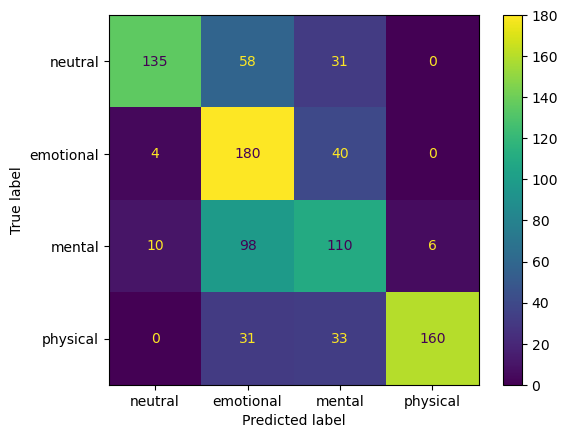

In [44]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

plot_confusion()

<a id='t7'></a>
## Task 7 - Basic Confusion Matrix Understanding (5 Points).

 - Answer the following questions concerning the above Confusion Matrix.  
 - Record (hardcode) your answers in the answer variables in the cell below for autograding purposes.  
 - Your answers should use the Python types **int**, **float**, or **str** as appropriate.
 
Q1. What is the number of __Correctly Predicted__ for the _mental_ activity?  
Q2. How many __False Positive__ predictions were made for the _neutral_ activity?  
Q3. How many __False Negative__ predictions were made for the _physical_ activity?  
Q4. What is the __Precision__ Score for the _mental_ activity? (round to three decimal places)  
Q5. What is the __Recall__ Score for the _emotional_ activity? (round to three decimal places)  
Q6. What is the overall __Accuracy__ for the current model? (round to three decimal places)  
Q7. Which activity is most confused for _mental_ activity when not?  

<a href='#toc'>TOC</a>

In [45]:
# hidden autograder codeblock
task_id = "7"

In [96]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = confusion_matrix_questions()

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert (
    len(stu_ans) == 7
), f"Task {task_id}: Your answer tuple does not contain the correct number of answers."
assert isinstance(stu_ans[0], int), f"Task {task_id}: Answer one should be an integer"
assert isinstance(stu_ans[1], int), f"Task {task_id}: Answer two should be an integer"
assert isinstance(stu_ans[2], int), f"Task {task_id}: Answer three should be an integer"
assert isinstance(stu_ans[3], float), f"Task {task_id}: Answer four should be a float"
assert isinstance(stu_ans[4], float), f"Task {task_id}: Answer five should be a float"
assert isinstance(stu_ans[5], float), f"Task {task_id}: Answer six should be a float"
assert isinstance(stu_ans[6], str), f"Task {task_id}: Answer seven should be a string"


del stu_ans

Task 10 - AG tests
Task 10 - your answer:
(110, 14, 64, 0.514, 49.046, 65.29, 'emotional')


<a id='t8'></a>
## Task 8 - Feature Importance, part 1 (5 Points).
#### Now we want to explore how some models are able to provide additional insight into the features that played a prominent role in the estimation outcome.
 - Produce a function that implements a RandomForestClassifier model, which includes the [**feature_importances_**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) attribute.
- The function accepts a single argument for the top X number of features, the default value will be 10.
  - The classifier should use only two parameters:
    - random_state=42
    - n_jobs=-1
- Use your previously defined functions to derive your train and test sets.
- Using code that you had previously developed, include all features who's name includes the substring defined by **base_feature_selector** ([library imports](#library-imports)).
 - The function should return a tuple of two elements.
   - The first element will be a **sorted** list of tuples in the form **\[('feature_name', importance_value),...\]**. The list of tuples should be sorted in descending order.
     - This list of tuples should be sorted in **descending order** of feature_importance.
   - The second element (test data score) should be an np.float64 value.  

<a href='#toc'>TOC</a>

In [48]:
# hidden autograder codeblock
task_id = "8"

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [51]:
def get_top_features(top=10):
    # Train model
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_size=0.2)
    mad_features = [col for col in X_train.columns if base_feature_selector in col]
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    model.fit(X_train[mad_features], y_train)

    # Get feature importances
#     print("Feature importances: {}".format(model.feature_importances_))
    feature_importances = list(zip(X_train[mad_features].columns[:-1], model.feature_importances_))
#     print("1",feature_importances)

    feature_importances.sort(key=lambda x: x[1], reverse=True)
#     print("2",feature_importances)
    # Get test score
    test_score = np.float64(model.score(X_test[mad_features], y_test))

    # Return tuple of feature importances and test score
    return (feature_importances[:top], test_score)
 
#     top_x, score = None, None
#     return top_x, score
get_top_features()

test size => 8


([('IT_Original_mad_187', 0.11256580865773229),
  ('IT_LF_mad_202', 0.09870328537109924),
  ('IT_RF_mad_217', 0.0671973359402965),
  ('ECG_original_mad_13', 0.0654974139451176),
  ('ECG_amplitude_RR_mad_41', 0.05722319121238872),
  ('EDA_processed_mad_456', 0.043237638008223805),
  ('ECG_HR_min_div_mad_55', 0.04086105034492251),
  ('IT_p_Total_mad_317', 0.038767754759935644),
  ('IT_PSD_mad_247', 0.03813835740667452),
  ('ECG_RR_window_mad_27', 0.03673768438730162)],
 0.6863839285714286)

In [52]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = get_top_features()

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert (
    len(stu_ans) == 2
), f"Task {task_id}: Your answer tuple does not contain the correct number of elements."

assert isinstance(
    stu_ans[0], list
), f"Task {task_id}: The first tuple element should be a list"

assert (
    len(stu_ans[0]) == 10
), f"Task {task_id}: The default number of top features is not correct."

assert isinstance(
    stu_ans[1], np.float64
), f"Task {task_id}: get_top_features() second return element should be an np.float64."

del stu_ans

# Some hidden tests

Task 8 - AG tests
test size => 8
Task 8 - your answer:
([('IT_Original_mad_187', 0.11256580865773229), ('IT_LF_mad_202', 0.09870328537109924), ('IT_RF_mad_217', 0.0671973359402965), ('ECG_original_mad_13', 0.0654974139451176), ('ECG_amplitude_RR_mad_41', 0.05722319121238872), ('EDA_processed_mad_456', 0.043237638008223805), ('ECG_HR_min_div_mad_55', 0.04086105034492251), ('IT_p_Total_mad_317', 0.038767754759935644), ('IT_PSD_mad_247', 0.03813835740667452), ('ECG_RR_window_mad_27', 0.03673768438730162)], 0.6863839285714286)


<a id='t9'></a>
## Task 9 - Feature Importance, part 2 (10 Points).

#### The value of Feature Importance 
- This follow-on task will use the same **RandomForestClassifier** model as in your get_top_features() function.
- The new model will use a portion of the output returned by the get_top_features() function.
- Use the previously defined functions to derive your train and test datasets.
- Create a loop that trains your model with an incrementally increasing number of features from the top features list.
  - The first pass will include the topmost important feature, the second pass will include the top two most important features and so on until the final pass of all top X features.
- Your function should return a list of feature-based test data scores produced by the model.  

<a href='#toc'>TOC</a>

In [53]:
# hidden autograder codeblock
task_id = "9"

In [54]:
def features(top=10):
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_size=0.2)
    mad_features = [col for col in X_train.columns if base_feature_selector in col]
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    model.fit(X_train[mad_features], y_train)

    feature_importances = list(zip(X_train[mad_features].columns[:-1], model.feature_importances_))
    feature_importances.sort(key=lambda x: x[1], reverse=True)
    return (feature_importances[:top])#, test_score)

type(features(top=10))

test size => 8


list

In [55]:
def score_top_features(top=10):
    ll =[0,1,2,3,4,5,6,7,8,9]
    nextV= 0
    setup =[]
    for i in ll:
        nextV = i +1
        row = []
        for j in range(nextV):
            row.append(j)
        setup.append(row)
    scores = []
    tf = features()
    print(type(tf))
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_size=0.2)

    mad_features = [col for col in X_train.columns if base_feature_selector in col]
    for i in range(len(setup)):
#         print("SETUP", setup[i]) # a combination of features, as ranked in 
        testable = []
        for j in setup[i]:
#             print(tf[j][0])
            testable.append(tf[j][0])
#         print(testable)
        model = RandomForestClassifier(random_state=42, n_jobs=-1)
        model.fit(X_train[testable], y_train)
        test_score = np.float64(model.score(X_test[testable], y_test))
#         pkg = len(testable), test_score
        scores.append(test_score)
    
    return scores
print(score_top_features())

test size => 8
<class 'list'>
test size => 8
[0.45200892857142855, 0.4654017857142857, 0.43861607142857145, 0.43861607142857145, 0.46763392857142855, 0.46651785714285715, 0.49330357142857145, 0.6618303571428571, 0.6551339285714286, 0.6796875]


In [56]:
# Autograder tests
print(f"Task {task_id} - AG tests")
top = 10
stu_ans = score_top_features(top)

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert (
    len(stu_ans) == top
), f"Task {task_id}: Your function does not return the correct number of scores."

assert all(
    isinstance(x, np.float64) for x in stu_ans
), f"Task {task_id}: One or more of the returned scores is of an incorrect type."


del stu_ans

Task 9 - AG tests
test size => 8
<class 'list'>
test size => 8
Task 9 - your answer:
[0.45200892857142855, 0.4654017857142857, 0.43861607142857145, 0.43861607142857145, 0.46763392857142855, 0.46651785714285715, 0.49330357142857145, 0.6618303571428571, 0.6551339285714286, 0.6796875]


<a id='scoresplot'></a>
## Scores Plot
The plot_scores() function accepts top X features argumnet which defaults to a value of 10. Feel free to change the argument to better see how accuracy is affected by the number of top features used to train the model.  

<a href='#toc'>TOC</a>

In [57]:
def plot_scores(top=10):
    if top > 29:
        top = 29

    top_x_features, score = get_top_features(top)
    scores = score_top_features(top)

    importance_scores = [score[1] for score in top_x_features]
    x_axis = np.arange(1, len(scores) + 1)

    plt.figure(figsize=(8, 6))

    plt.xticks(x_axis)
    plt.ylim([0, max(score, max(importance_scores)) + 0.05])
    plt.xlabel("Number of Top 10 Features Used")
    plt.ylabel("Score Value")
    plt.grid(alpha=0.25)

    plt.plot(x_axis, scores, label="Accuracy Score", c="g", linestyle="solid")

    plt.plot(
        x_axis,
        importance_scores,
        label="Feature Importance Scores",
        c="r",
        linestyle="solid",
    )

    plt.axhline(
        score,
        label=f"All '{base_feature_selector}' features score",
        c="b",
        linestyle="dashed",
    )

    plt.legend()
    plt.tight_layout()

    return

test size => 8
test size => 8
<class 'list'>
test size => 8


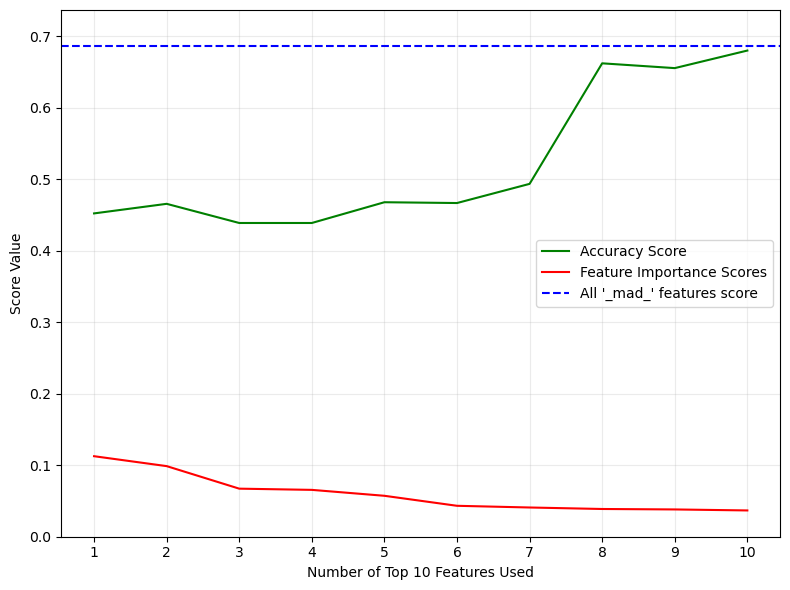

In [58]:
# Plot accuracy vs feature importance
# the plot_scores() function accepts an optional top N parameter.
# Remember to comment the following function call before submitting the notebook.

plot_scores()

<a id='t10'></a>
## Task 10 - Final project (50 Points).

- The final task for this assignment is open-ended with only a few **constraints**. Using any of the Supervised Machine Learning techniques and models presented in this course, produce a model that produces a best-possible ROC-AUC score. Your **Task 10** points will be based solely on the highest ROC-AUC score achieved. The primary constraint for this task is that you will be able to utilize not more than **10** of the 533 available data features in the training and scoring of your model. A quick calculation of the number of available combinations C(n, r) = C(533, 10) = $\frac{n!}{r!(n-r)!}$ = 4.684e20. That is very large number of possible combinations (the number of permutations is even greater)! Because of the intractability of checking all possible 10-feature combinations, it will be necessary to devise a scheme whereby your algorithm makes a selection of features and scores that selection. Be creative but also efficient in your feature selection process; this may well mean computational efficiency. Attempting to examine too many features at one time can be computationally very expensive! Because multiple feature selection cycles may be necessary, you will also need to develop an efficient method of keeping track of the top model, features, and score.  

- Why would we want to limit the number of features? 
   1. The creator of the project may want to minimize the number of sensors/measurements required to move the project forward.
   2. The final product will be used on a smartphone where resource consumption is always a concern.
   3. Computational resource availability of the development environment could be constrained due to budget availability.
   4. The development environment may be intentionally constrained to mimic the production environment.
  
  
- You will find that even with these limitations, some model choices will still consume significant resources, even to the point of crashing the Python kernel!  

- Use your previously defined functions to derive your train and test sets.
- If feasible, expand upon your previously created feature selection code.
- Use the following parameters when establishing your [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) method:
    - average="macro"
    - multi_class="ovr"
- The activity_model() function:
  - arguments accepted:: integer: random_state=42
  - function return:: tuple: (fit_model, feature_list, roc_auc_score)  
  (sklearn.estimator, \[str, ..., str\], float)

<a href='#toc'>TOC</a>

In [59]:
# hidden autograder codeblock
task_id = "10"

In [60]:
from sklearn.metrics import (
    auc,
    roc_curve,
    confusion_matrix,
    PrecisionRecallDisplay,
    precision_recall_curve,
    plot_precision_recall_curve)

In [61]:
df10 = get_sensor_data()

In [62]:
cm = df10.corr().values

In [97]:
df10.corr()

,Activity_Label,ECG_original_mean_1,ECG_original_std_2,ECG_original_trimmean25_3,ECG_original_median_4,ECG_original_skewness_5,ECG_original_kurtosis_6,ECG_original_max_7,ECG_original_min_8,ECG_original_prctile25_9,...,EDA_Functionals_power_Filt2skewness_524,EDA_Functionals_power_Filt2kurtosis_525,EDA_Functionals_power_Filt2max_526,EDA_Functionals_power_Filt2min_527,EDA_Functionals_power_Filt2prctile25_528,EDA_Functionals_power_Filt2prctile75_529,EDA_Functionals_power_Filt2geomean(abs)_530,EDA_Functionals_power_Filt2harmmean_531,EDA_Functionals_power_Filt2mad_532,EDA_Functionals_power_Filt2baseline_533
Activity_Label,1.000000,0.249629,0.450912,0.256437,0.263114,-0.280015,-0.240930,0.498960,-0.498530,-0.153692,...,0.007962,0.008005,0.235122,0.166713,0.239280,0.237982,0.247874,0.241178,0.235260,0.018079
ECG_original_mean_1,0.249629,1.000000,0.261175,0.991501,0.913595,-0.254409,-0.012629,0.320761,-0.117415,0.462106,...,0.025834,0.026071,0.047177,0.097682,0.048841,0.048048,0.051676,0.095557,0.047194,-0.057268
ECG_original_std_2,0.450912,0.261175,1.000000,0.268125,0.290984,-0.276402,-0.246734,0.836362,-0.833158,-0.648999,...,0.067749,0.067641,0.173077,0.170087,0.177399,0.175512,0.185251,0.201659,0.173205,0.026943
ECG_original_trimmean25_3,0.256437,0.991501,0.268125,1.000000,0.943688,-0.295331,-0.016901,0.298215,-0.143808,0.460076,...,0.023581,0.023828,0.044328,0.098102,0.045834,0.045139,0.048878,0.094068,0.044350,-0.057637
ECG_original_median_4,0.263114,0.913595,0.290984,0.943688,1.000000,-0.284797,-0.026138,0.272096,-0.161065,0.340827,...,0.020973,0.021244,0.035968,0.096911,0.037082,0.036597,0.040038,0.078826,0.036008,-0.055416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EDA_Functionals_power_Filt2prctile75_529,0.237982,0.048048,0.175512,0.045139,0.036597,-0.049815,0.022662,0.283706,-0.243721,-0.072115,...,0.101179,0.100630,0.999745,0.286805,0.999861,1.000000,0.998347,0.601147,0.999762,0.865911
EDA_Functionals_power_Filt2geomean(abs)_530,0.247874,0.051676,0.185251,0.048878,0.040038,-0.053159,0.022707,0.295281,-0.255385,-0.076244,...,0.104533,0.103982,0.997416,0.331640,0.998870,0.998347,1.000000,0.643807,0.997477,0.857897
EDA_Functionals_power_Filt2harmmean_531,0.241178,0.095557,0.201659,0.094068,0.078826,-0.053732,0.046220,0.297808,-0.259766,-0.064164,...,0.108967,0.108625,0.592879,0.836206,0.610565,0.601147,0.643807,1.000000,0.593377,0.448489
EDA_Functionals_power_Filt2mad_532,0.235260,0.047194,0.173205,0.044350,0.036008,-0.048886,0.022925,0.280791,-0.241030,-0.071053,...,0.099539,0.098992,0.999999,0.279347,0.999537,0.999762,0.997477,0.593377,1.000000,0.867399


In [98]:
cm

array([[ 1.    ,  0.2496,  0.4509, ...,  0.2412,  0.2353,  0.0181],
       [ 0.2496,  1.    ,  0.2612, ...,  0.0956,  0.0472, -0.0573],
       [ 0.4509,  0.2612,  1.    , ...,  0.2017,  0.1732,  0.0269],
       ...,
       [ 0.2412,  0.0956,  0.2017, ...,  1.    ,  0.5934,  0.4485],
       [ 0.2353,  0.0472,  0.1732, ...,  0.5934,  1.    ,  0.8674],
       [ 0.0181, -0.0573,  0.0269, ...,  0.4485,  0.8674,  1.    ]])

In [100]:
#get a df to correlat to
dfTarget = df10['Activity_Label']
compared = pd.DataFrame([dfTarget])
# type(compared)
# compared.corrwith(df10, axis=0)

In [99]:
corr_matrix = df10.corr()
corr_matrix = corr_matrix.where(~(corr_matrix >= .9)).stack().nlargest(50000)
print(corr_matrix)

IT_HF_mean_291                  IT_p_Total_min_312                0.899960
IT_p_Total_min_312              IT_HF_mean_291                    0.899960
EDA_processed_trimmean25_342    EDA_processed_median_343          0.899883
EDA_processed_median_343        EDA_processed_trimmean25_342      0.899883
ECG_RR_window_min_22            ECG_RR_window_harmmean_26         0.899827
                                                                    ...   
EDA_Original_min_437            IT_Original_std_176               0.141394
IT_Original_harmmean_186        EDA_processed_geomean(abs)_454    0.141393
EDA_processed_geomean(abs)_454  IT_Original_harmmean_186          0.141393
ECG_hrv_prctile75_76            IT_BRV_min_228                    0.141389
IT_BRV_min_228                  ECG_hrv_prctile75_76              0.141389
Length: 50000, dtype: float64


In [67]:
# limit = list(range(df10.shape[0]))

In [68]:
collection = []
for index, value in corr_matrix.iteritems():
#     print( index[0], index[1], value)
    endDict = {}
    factor = " "
    coef = 0.0
    for i in range(len(index)):
        if index[i] == 'Activity_Label':
#             print( index[0], index[1], value)
            if index[0] != 'Activity_Label':
                endDict = {"factor":index[0], "coef":value}
                collection.append(endDict)

            if index[1] != 'Activity_Label':
                endDict = {"factor":index[1], "coef":value}
                collection.append(endDict)
dfFinal = pd.DataFrame(collection)

In [69]:
dfFinal.drop_duplicates(inplace=True)

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
top10 = list(dfFinal.iloc[:10]['factor'])

In [72]:
top10_2nd = list(dfFinal.iloc[10:20]['factor'])

In [73]:
top10_3rd = list(dfFinal.iloc[20:30]['factor'])

In [74]:
top10_4th = list(dfFinal.iloc[30:40]['factor'])

In [75]:
top10_5th = list(dfFinal.iloc[40:50]['factor'])

In [76]:
top10_6th = list(dfFinal.iloc[50:60]['factor'])

In [77]:
top10_7th = list(dfFinal.iloc[60:70]['factor'])

In [78]:
top10_8th = list(dfFinal.iloc[70:80]['factor'])

In [79]:
top10_9th = list(dfFinal.iloc[80:90]['factor'])

In [80]:
top10_10th = list(dfFinal.iloc[90:100]['factor'])

In [81]:
top10_11th = list(dfFinal.iloc[100:110]['factor'])

In [82]:
top10_12th = list(dfFinal.iloc[110:120]['factor'])

In [83]:
top10_13th = list(dfFinal.iloc[120:130]['factor'])

In [84]:
top10_14th = list(dfFinal.iloc[130:140]['factor'])

In [85]:
top10_15th = list(dfFinal.iloc[140:150]['factor'])

In [86]:
top10_16th = list(dfFinal.iloc[150:160]['factor'])

In [87]:
top10_22nd = list(dfFinal.iloc[220:230]['factor'])

In [88]:
# The activity_model() function:

# arguments accepted:: integer: random_state=42
# function return:: tuple: (fit_model, feature_list, roc_auc_score)
# (sklearn.estimator, [str, ..., str], float)

In [89]:
def activity_model(random_state=42):
    usableConst = top10_4th
    model, features, score = (None,) * 3
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_size=0.2)

    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    model.fit(X_train[usableConst], y_train)
    test_score = np.float64(model.score(X_test[usableConst], y_test))
    
    preds = model.predict(X_test[usableConst])
    probs = model.predict_proba(X_test[usableConst])

    score = roc_auc_score(y_test, probs, multi_class="ovr")
    features = usableConst
    
#     print(score_auc)
    return (model, features, score)
print(activity_model(42))

test size => 8
(RandomForestClassifier(n_jobs=-1, random_state=42), ['ECG_original_std_2', 'IT_MF_skewness_281', 'ECG_original_mad_13', 'IT_BR_mean_220', 'ECG_original_geomean(abs)_11', 'ECG_original_prctile75_10', 'ECG_RSAindex_61', 'ECG_HR_min_div_std_44', 'ECG_amplitude_RR_prctile75_38', 'IT_BRV_baseline_234'], 0.8761575919430272)


In [90]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.



<a id='t10ag'></a>
## Task 10 Autograder Scoring
<a href='#toc'>TOC</a>

In [91]:
# Hidden autograder model validation
# test for AUC score >= 0.83

print(f"Task {task_id} - AG tests")
stu_ans = activity_model()

print(
    f"Task {task_id} - your answers:\n{stu_ans[0]}\n\n{stu_ans[1]}\n\nScore: {stu_ans[2]}\n"
)



assert (
    stu_ans[2] >= 0.83
), f"Task {task_id}: Your test AUC {stu_ans[2]:.4f} is less than 0.83. You will not receive any points for this task."

Task 10 - AG tests
test size => 8
Task 10 - your answers:
RandomForestClassifier(n_jobs=-1, random_state=42)

['ECG_original_std_2', 'IT_MF_skewness_281', 'ECG_original_mad_13', 'IT_BR_mean_220', 'ECG_original_geomean(abs)_11', 'ECG_original_prctile75_10', 'ECG_RSAindex_61', 'ECG_HR_min_div_std_44', 'ECG_amplitude_RR_prctile75_38', 'IT_BRV_baseline_234']

Score: 0.8761575919430272



In [92]:
# autograder test - AUC >= 0.85
level = 2


assert (
    stu_ans[2] >= 0.85
), f"Task {task_id}: Your test AUC {stu_ans[2]:.4f} is less than 0.85. You will receive 25 points for this task."

In [93]:
# autograder test - AUC >= 0.87
level = 3


assert (
    stu_ans[2] >= 0.87
), f"Task {task_id}: Your test AUC {stu_ans[2]:.4f} is less than 0.87. You will receive 30 points for this task."

In [94]:
# autograder test - AUC >= 0.89


assert (
    stu_ans[2] >= 0.89
), f"Task {task_id}: Your test AUC {stu_ans[2]:.4f} is less than 0.89. You will receive 35 points for this task."

AssertionError: Task 10: Your test AUC 0.8762 is less than 0.89. You will receive 35 points for this task.

In [ ]:
# autograder test - AUC >= 0.91


assert (
    stu_ans[2] >= 0.91
), f"Task {task_id}: Your test AUC {stu_ans[2]:.4f} is less than 0.91. You will receive 45 points for this task."

del stu_ans

<a href='#toc'>TOC</a>